In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_df=pd.read_csv("htrain.csv")

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

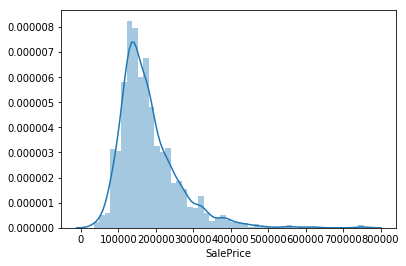

In [6]:
sns.distplot(train_df["SalePrice"])
plt.show()

In [7]:
# If the skewness is between -0.5 and 0.5, the data is fairly symmetrical
# If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data is moderately skewed
# If the skewness is less than -1 or greater than 1, the data is highly skewed

print("Skewness: %f" % train_df["SalePrice"].skew())

Skewness: 1.882876


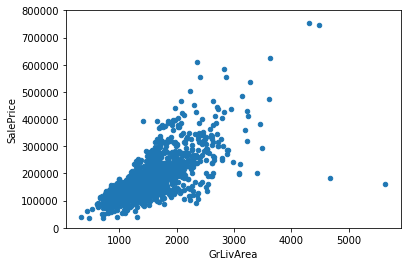

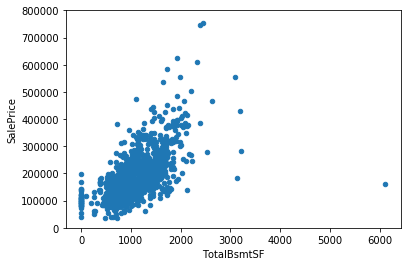

In [10]:
# Initial set of features to consider based on intuition:
# - OverallQual
# - YearBuilt.
# - TotalBsmtSF.
# - GrLivArea.

## RELATIONSHIP WITH NUMERICAL VARIABLES

# scatter plot grlivarea/saleprice: linear relationship
data = pd.concat([train_df['SalePrice'], train_df['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000))
plt.show()

# scatter plot totalbsmtsf/saleprice
data=pd.concat([train_df["SalePrice"],train_df["TotalBsmtSF"]], axis=1)
data.plot.scatter(x="TotalBsmtSF", y="SalePrice", ylim=(0,800000))
plt.show()

In [11]:
# correlation between two variables (in a linear relationship, correlation is 1)

print(train_df["GrLivArea"].corr(train_df["SalePrice"]))
print(train_df["TotalBsmtSF"].corr(train_df["SalePrice"]))

0.7086244776126522
0.6135805515591954


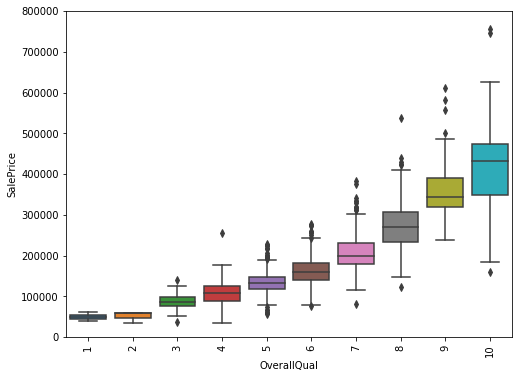

In [12]:
# RELATIONSHIP WITH CATEGORICAL VARIABLES

# box plot overallqual/saleprice

data=pd.concat([train_df["SalePrice"], train_df["OverallQual"]], axis=1)
f, ax= plt.subplots(figsize=(8,6))
fig=sns.boxplot(x="OverallQual", y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
plt.show()

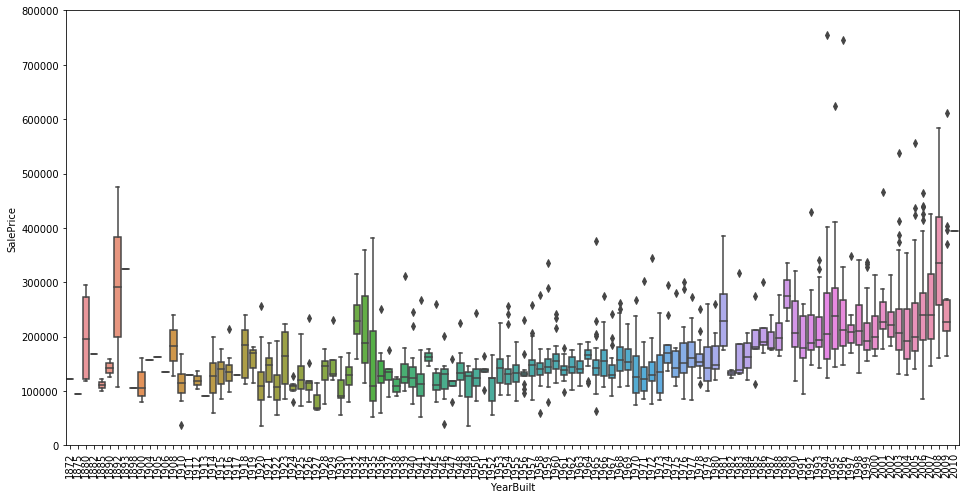

In [13]:
# box plot YearBuilt/saleprice

data=pd.concat([train_df["SalePrice"], train_df["YearBuilt"]], axis=1)
f, ax= plt.subplots(figsize=(16,8))
fig=sns.boxplot(x="YearBuilt", y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
plt.show()

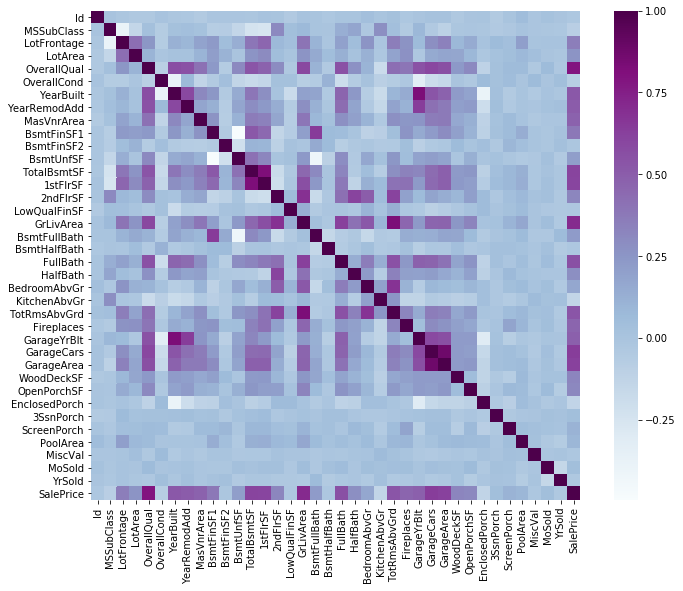

In [20]:
"""
Note: we don't know if 'SalePrice' is in constant prices. Constant prices try to remove the 
effect of inflation. If 'SalePrice' is not in constant prices, it should be, so than prices 
are comparable over the years.
- 'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships 
are positive, which means that as one variable increases, the other also increases. In the case 
of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.
- 'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems
to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase
with the overall quality.
""
Until now we just followed our intuition and analysed the variables we thought were important. In spite of our 
efforts to give an objective character to our analysis, we must say that our starting point was subjective."""

# correlation matrix
corrmat=train_df.corr()
f, ax= plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=1, square=True, cmap="BuPu")
plt.show()

In [21]:
"""
At first sight, there are two white colored squares that get my attention. The first one refers to the 'TotalBsmtSF' and
'1stFlrSF' variables, and the second one refers to the 'GarageX' variables. Both cases show how significant the
correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of 
multicollinearity.
Also check out the correlations of other variables with 'SalePrice'. Observations:
- 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'.
- 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, the number of cars that 
    fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. You'll 
    never be able to distinguish them. Therefore, we just need one of these variables in our analysis 
    (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
- 'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess
     was right
- Honorable mentions: 'FullBath', 'YearBuilt
"""

## HANDLING MISSING DATA
"""
Important questions when thinking about missing data:
- How prevalent is the missing data?
- Is missing data random or does it have a pattern?
The answer to these questions is important for practical reasons because missing data can imply a reduction of the 
sample size. This can prevent us from proceeding with the analysis. Moreover, from a substantive perspective, we need 
to ensure that the missing data process is not biased and hiding an inconvenient truth.
"""

## missing data

total=train_df.isnull().sum().sort_values(ascending=False)
percent=(train_df.isnull().sum() / train_df.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
print(missing_data.head(20))

              Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageCond       81  0.055479
GarageType       81  0.055479
GarageYrBlt      81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
BsmtQual         37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685
Utilities         0  0.000000


In [22]:
"""
Let's analyse this to understand how to handle the missing data.
We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it
never existed. This means that we will not try any trick to fill the missing data in these cases. According to this,
there is a set of variables (e.g. 'PoolQC', 'MiscFeature', 'Alley', etc.) that we should delete. The point is: will we 
miss this data? I don't think so. None of these variables seem to be very important, since most of them are not aspects 
in which we think about when buying a house (maybe that's the reason why data is missing?). Moreover, looking closer at 
the variables, we could say that variables like 'PoolQC', 'MiscFeature' and 'FireplaceQu' are strong candidates for 
outliers, so we'll be happy to delete them.
In what concerns the remaining cases, we can see that 'GarageX' variables have the same number of missing data.
Since the most important information regarding garages is expressed by 'GarageCars' and considering that we are just 
talking about 5% of missing data, I'll delete the mentioned 'GarageX' variables. The same logic applies to 'BsmtX' 
variables.
Regarding 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential. Furthermore, they have 
a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information 
if we delete 'MasVnrArea' and 'MasVnrType'.
Finally, we have one missing observation in 'Electrical'. Since it is just one observation, we'll delete this observation 
and keep the variable.
In summary, to handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'.
In 'Electrical' we'll just delete the observation with missing data.
"""

## dealing with missing data

train_df=train_df.drop((missing_data[missing_data["Total"]>1]).index, 1)
train_df=train_df.drop(train_df.loc[train_df["Electrical"].isnull()].index)
train_df.isnull().sum().max()

0